In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math
import string
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

***Part a and b: Read in and train/test split***

In [312]:
df_eminem = pd.read_csv("Youtube04-Eminem.csv")

In [313]:
df_eminem.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [314]:
df_eminem.dtypes

COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

In [315]:
df_eminem.shape

(448, 5)

In [316]:
H = df_eminem[df_eminem['CLASS'] == 0]
S = df_eminem[df_eminem['CLASS'] == 1]

In [317]:
lenH = len(H['CLASS'])
lenS = len(S['CLASS'])

In [318]:
trainH = H.iloc[0:math.floor(0.8*lenH)]
testH = H.iloc[math.floor(0.8*lenH):]
trainS = S.iloc[0:math.floor(0.8*lenS)]
testS = S.iloc[math.floor(0.8*lenS):]
train = pd.concat([trainH, trainS])
test = pd.concat([testH, testS])

***Part C. TF-IDF***

Total Number of Documents

In [319]:
numdoc = len(df_eminem['CONTENT'])

Test Set List

In [320]:
testcomment = test['CONTENT']
newtest = []
testwords = []
for row in testcomment:
    listrow = row.split(' ')
    newtest.append(listrow)
    testwords.extend(listrow)

In [321]:
len(newtest)

90

Training Set List

In [322]:
traincomment = train['CONTENT']
newtrain = []
trainwords = []
for row in traincomment:
    listrow = row.split(' ')
    newtrain.append(listrow)
    trainwords.extend(listrow)

In [323]:
len(newtrain)

358

Bag of Words

In [324]:
uniquewords = []
for word in trainwords:
    if word not in uniquewords:
        uniquewords.append(word)
for word in testwords:
    if word not in uniquewords:
        uniquewords.append(word)
#print(uniquewords)
len(uniquewords)

2510

Determine IDF on Entire DataSet

In [325]:
#get an array of words from the entire dataset
dftemp = []
for line in df_eminem['CONTENT']:
    dftemp.append(line.split(' '))

In [326]:
idflist = []
for word in uniquewords:
    count = 0
    for i in dftemp:
        if word in i:
            count = count + 1
    idf = math.log(numdoc/(count+1))
    idflist.append(idf)
len(idflist)

2510

Function for TF

In [327]:
def TF(comment, bag):
    numbag = len(bag)
    TFlist = []
    for i in range(0,numbag):
        count = 0
        for word in comment:
            if bag[i] == word:
                count = count+1
        tf = count/len(comment)
        TFlist.append(tf)
    return TFlist

Running TFIDF for Test

In [328]:
tflist = []
for i in newtrain:
    temp = TF(i, uniquewords)
    tflist.append(temp)

In [329]:
tfidflist = np.multiply(tflist, idflist)

In [330]:
tfidflist.shape

(358, 2510)

In [331]:
traindf_tfidf = pd.DataFrame(tfidflist)
traindf_tfidf.columns = uniquewords
traindf_tfidf.head(5)

,I,always,end,up,coming,back,to,this,song<br,/>﻿,...,certain,things?,Sorry,motivate,they’ve,you’re,bored,far!,1000,started!
0,0.162746,0.449536,0.541165,0.310906,0.402535,0.402535,0.161616,0.127648,0.541165,0.415888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085099,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
traindf_tfidf.shape

(358, 2510)

Running TFIDF on Test

In [333]:
test_tflist = []
for i in newtest:
    temp = TF(i, uniquewords)
    test_tflist.append(temp)

In [334]:
test_tfidflist = np.multiply(test_tflist, idflist)

In [335]:
test_tfidflist.shape

(90, 2510)

In [336]:
testdf_tfidf = pd.DataFrame(test_tfidflist)
testdf_tfidf.columns = uniquewords
testdf_tfidf.head(5)

,I,always,end,up,coming,back,to,this,song<br,/>﻿,...,certain,things?,Sorry,motivate,they’ve,you’re,bored,far!,1000,started!
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31912,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Running TFIDF on the Entire Dataset

In [337]:
x_tfidf = pd.concat([traindf_tfidf, testdf_tfidf])
y_tfidf = pd.concat([train['CLASS'], test['CLASS']])

In [338]:
#just testing
a = [0,1,2]
x_tfidf.iloc[a]
y_tfidf.iloc[a]

1    0
3    0
5    0
Name: CLASS, dtype: int64

***Part D. L2 Penalized Logistic Regresion***

i)

In [339]:
kf = KFold(n_splits=5)
kf.get_n_splits(x_tfidf)
KFold(n_splits=5)
print(kf)
values = [10**i for i in range(-5,6)]
scores = []
for lamda in values:
    total = 0
    for train_index, test_index in kf.split(x_tfidf):
        train_index = list(train_index)
        test_index = list(test_index)
        X_train, X_test = x_tfidf.iloc[train_index], x_tfidf.iloc[test_index]
        y_train, y_test = y_tfidf.iloc[train_index], y_tfidf.iloc[test_index]

        reg = LogisticRegression(penalty="l2", C=lamda).fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        total = total + score

    score = total / 5 
    scores.append(score)
    print("K =", lamda, ": " ,score)

KFold(n_splits=5, random_state=None, shuffle=False)
K = 1e-05 :  0.15235955056179776
K = 0.0001 :  0.15235955056179776
K = 0.001 :  0.15235955056179776
K = 0.01 :  0.15235955056179776
K = 0.1 :  0.29310861423220974
K = 1 :  0.6839700374531835
K = 10 :  0.7462671660424469
K = 100 :  0.7573782771535581
K = 1000 :  0.7529338327091136
K = 10000 :  0.7573782771535581
K = 100000 :  0.7573533083645443


ii)

In [340]:
lamda = 10000

In [341]:
reg = LogisticRegression(penalty="l2", C=lamda)

In [342]:
x_train = traindf_tfidf
y_train = train['CLASS']
x_test = testdf_tfidf
y_test = test['CLASS']

In [343]:
reg.fit(x_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [344]:
reg.score(x_train, y_train)

1.0

In [345]:
predtrain = reg.predict(x_train)

In [346]:
print(confusion_matrix(y_train, predtrain))

[[162   0]
 [  0 196]]


In [347]:
print(classification_report(y_train,predtrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [348]:
predtrainprobs = reg.predict_proba(x_train)
predtrainprobs = predtrainprobs[:,1]

AUC: 1.0


Text(0, 0.5, 'FPR')

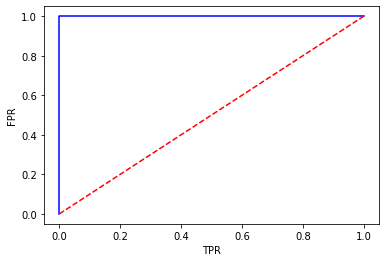

In [349]:
fpr, tpr, threshold = roc_curve(y_train, predtrainprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

iii)

In [350]:
reg.score(x_test, y_test)

0.8222222222222222

In [351]:
predtest = reg.predict(x_test)

In [352]:
print(confusion_matrix(y_test, predtest))

[[25 16]
 [ 0 49]]


In [353]:
print(classification_report(y_test,predtest))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        41
           1       0.75      1.00      0.86        49

    accuracy                           0.82        90
   macro avg       0.88      0.80      0.81        90
weighted avg       0.87      0.82      0.81        90



In [354]:
predtestprobs = reg.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.9561971129915381


Text(0, 0.5, 'FPR')

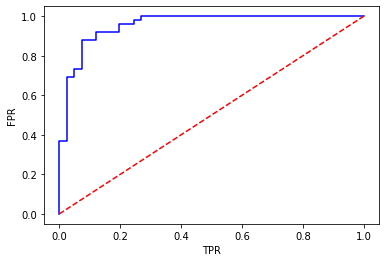

In [355]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

In [356]:
beta = [.1, .5, .9, 1, 5, 10]
for i in beta:
    print(fbeta_score(y_test, predtest, average='macro', beta=i))

0.8746955788558254
0.839702540797356
0.8122628355615533
0.8086124401913874
0.8033222591362126
0.8044493271079374


Precision is most important because we are dealing with spam and ham. We want to ensure that of the comments predicted spam, the majority must be spam or else the users will be frustrated for predicting their comments as spam. Whereas recall focuses on correctly detecting spam from the actual amount of spam.

***Part E. L1 Penalized Logistic Regression***

a)

In [358]:
kf = KFold(n_splits=5)
kf.get_n_splits(x_tfidf)
KFold(n_splits=5)
print(kf)
values = [10**i for i in range(-5,6)]
scores = []
for lamda in values:
    total = 0
    for train_index, test_index in kf.split(x_tfidf):
        train_index = list(train_index)
        test_index = list(test_index)
        X_train, X_test = x_tfidf.iloc[train_index], x_tfidf.iloc[test_index]
        y_train, y_test = y_tfidf.iloc[train_index], y_tfidf.iloc[test_index]

        reg = LogisticRegression(penalty="l1", C=lamda, solver='liblinear').fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        total = total + score

    score = total / 5 
    scores.append(score)
    print("K =", lamda, ": " ,score)

KFold(n_splits=5, random_state=None, shuffle=False)
K = 1e-05 :  0.45213483146067424
K = 0.0001 :  0.45213483146067424
K = 0.001 :  0.45213483146067424
K = 0.01 :  0.45213483146067424
K = 0.1 :  0.15235955056179776
K = 1 :  0.6235205992509363
K = 10 :  0.755056179775281
K = 100 :  0.76167290886392
K = 1000 :  0.7683895131086143
K = 10000 :  0.7817228464419476
K = 100000 :  0.7974032459425718


ii)

In [359]:
lamda = 100000

In [360]:
x_train = traindf_tfidf
y_train = train['CLASS']
x_test = testdf_tfidf
y_test = test['CLASS']

In [361]:
regl1 = LogisticRegression(penalty="l1", C=lamda, solver='liblinear')

In [362]:
regl1.fit(x_train, y_train)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [363]:
regl1.score(x_train, y_train)

1.0

In [364]:
predtrain = regl1.predict(x_train)

In [365]:
print(confusion_matrix(y_train, predtrain))

[[162   0]
 [  0 196]]


In [366]:
print(classification_report(y_train,predtrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [367]:
predtrainprobs = regl1.predict_proba(x_train)
predtrainprobs = predtrainprobs[:,1]

AUC: 1.0


Text(0, 0.5, 'FPR')

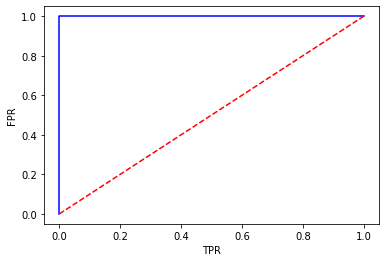

In [368]:
fpr, tpr, threshold = roc_curve(y_train, predtrainprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

iii)

In [369]:
regl1.score(x_test, y_test)

0.8555555555555555

In [370]:
predtest = regl1.predict(x_test)

In [371]:
print(confusion_matrix(y_test, predtest))

[[28 13]
 [ 0 49]]


In [372]:
print(classification_report(y_test,predtest))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        41
           1       0.79      1.00      0.88        49

    accuracy                           0.86        90
   macro avg       0.90      0.84      0.85        90
weighted avg       0.89      0.86      0.85        90



In [373]:
predtestprobs = regl1.predict_proba(x_test)
predtestprobs = predtestprobs[:,1]

AUC: 0.9482329517172722


Text(0, 0.5, 'FPR')

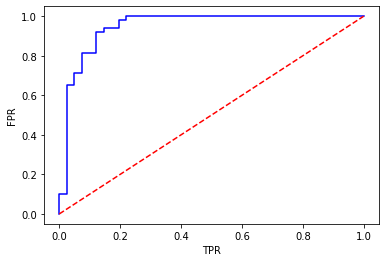

In [374]:
fpr, tpr, threshold = roc_curve(y_test, predtestprobs)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

***Part F. Naive Bayes***

In [375]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Training Set

In [376]:
train_predicted = model.predict(x_train)

In [377]:
print(classification_report(y_train, train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       196

    accuracy                           1.00       358
   macro avg       1.00      1.00      1.00       358
weighted avg       1.00      1.00      1.00       358



In [378]:
print(confusion_matrix(y_train, train_predicted))

[[162   0]
 [  0 196]]


In [379]:
train_prob = model.predict_proba(x_train)
train_prob = train_prob[:,1]

AUC: 1.0


Text(0, 0.5, 'FPR')

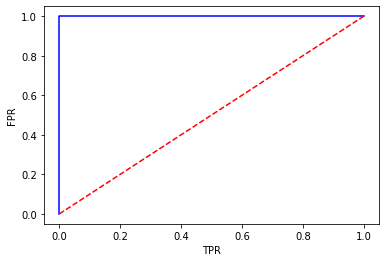

In [380]:
fpr, tpr, threshold = roc_curve(y_train, train_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

Test Set

In [381]:
test_predicted = model.predict(x_test)

In [382]:
print(classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.87      0.98      0.92        49

    accuracy                           0.91        90
   macro avg       0.92      0.90      0.91        90
weighted avg       0.92      0.91      0.91        90



In [383]:
print(confusion_matrix(y_test, test_predicted))

[[34  7]
 [ 1 48]]


In [384]:
test_prob = model.predict_proba(x_test)
test_prob = test_prob[:,1]

In [385]:
len(test_prob)

90

AUC: 0.9044300647088103


Text(0, 0.5, 'FPR')

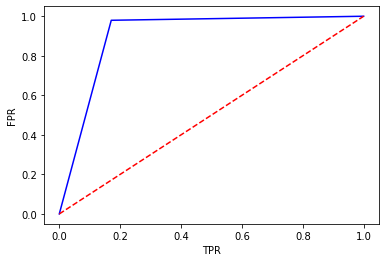

In [386]:
fpr, tpr, threshold = roc_curve(y_test, test_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

***Part G. Multinomial Priors***

In [387]:
MultiNB = MultinomialNB()
MultiNB.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Set

In [388]:
train_predicted = MultiNB.predict(x_train)

In [389]:
print(classification_report(y_train, train_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       162
           1       0.99      1.00      0.99       196

    accuracy                           0.99       358
   macro avg       0.99      0.99      0.99       358
weighted avg       0.99      0.99      0.99       358



In [390]:
print(confusion_matrix(y_train, train_predicted))

[[160   2]
 [  0 196]]


In [391]:
train_prob = MultiNB.predict_proba(x_train)
train_prob = train_prob[:,1]

AUC: 1.0


Text(0, 0.5, 'FPR')

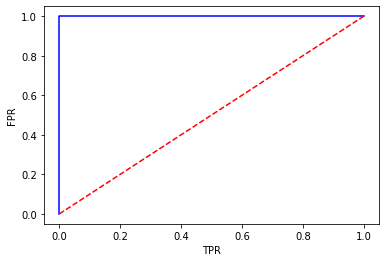

In [392]:
fpr, tpr, threshold = roc_curve(y_train, train_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')

Test Set

In [393]:
test_predicted = MultiNB.predict(x_test)

In [394]:
print(classification_report(y_test, test_predicted))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        41
           1       0.80      1.00      0.89        49

    accuracy                           0.87        90
   macro avg       0.90      0.85      0.86        90
weighted avg       0.89      0.87      0.86        90



In [395]:
print(confusion_matrix(y_test, test_predicted))

[[29 12]
 [ 0 49]]


In [396]:
test_prob = MultiNB.predict_proba(x_test)
test_prob = test_prob[:,1]

AUC: 0.9606769537083125


Text(0, 0.5, 'FPR')

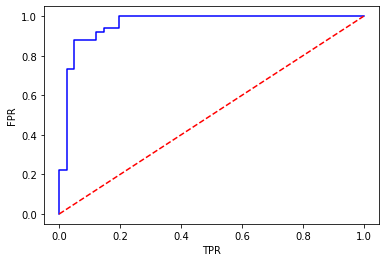

In [397]:
fpr, tpr, threshold = roc_curve(y_test, test_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)
plt.plot(fpr, tpr, color='blue',
label='ROC (AUC = %0.4f)' % auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('TPR')
plt.ylabel('FPR')